In [2]:
import pandas as pd
import numpy as np
import datetime as dt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# ---------------------------------------------------------------------------------
# load train & test
# ---------------------------------------------------------------------------------
train = pd.read_csv('./data/train.csv')

test = pd.read_csv('./data/test.csv')

print('train', train.shape, 'test', test.shape)


train (7381, 3) test (11171, 2)


In [4]:
train.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [5]:
test.head()

,id,location
0,11066,location 481
1,18000,location 962
2,16964,location 491
3,4795,location 532
4,3392,location 600


In [6]:
train['location_id'] = train.location.apply(lambda x: int(x.split('location ')[1]))
test['fault_severity'] = -1
test['location_id'] = test.location.apply(lambda x: int(x.split('location ')[1]))
train.head()

,id,location,fault_severity,location_id
0,14121,location 118,1,118
1,9320,location 91,0,91
2,14394,location 152,1,152
3,8218,location 931,1,931
4,14804,location 120,0,120


In [7]:
features = train.append(test)
features = features.drop('location', axis=1)
print(features.shape)
features.head()

(18552, 3)


,id,fault_severity,location_id
0,14121,1,118
1,9320,0,91
2,14394,1,152
3,8218,1,931
4,14804,0,120


In [8]:
# ---------------------------------------------------------------------------------
# order ~ time
# ---------------------------------------------------------------------------------
severity_type = pd.read_csv('./data/severity_type.csv')
severity_type.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [9]:
severity_type.duplicated().sum()

0

In [10]:
severity_type_order = severity_type[['id']].drop_duplicates()
severity_type_order['order'] = 1. * np.arange(len(severity_type_order)) / len(severity_type_order)
severity_type_order.head()

,id,order
0,6597,0.000000
1,8011,0.000054
2,2597,0.000108
3,5022,0.000162
4,6852,0.000216


In [11]:
features = pd.merge(features, severity_type_order, how='inner', on='id')
print (features.shape)
features.head()

(18552, 4)


,id,fault_severity,location_id,order
0,14121,1,118,0.170009
1,9320,0,91,0.912947
2,14394,1,152,0.231458
3,8218,1,931,0.932514
4,14804,0,120,0.177285


In [12]:
# ---------------------------------------------------------------------------------
# location count
# ---------------------------------------------------------------------------------
location_count = features.groupby('location_id').count()[['id']]
location_count.columns = ['location_count']
location_count

,location_count
location_id,
1,69
2,22
3,4
4,9
5,1
...,...
1122,2
1123,1
1124,1


In [13]:
features = pd.merge(features, location_count, how='inner', left_on='location_id', right_index=True)
print(features.shape)
features.head()

(18552, 5)


,id,fault_severity,location_id,order,location_count
0,14121,1,118,0.170009,97
94,6821,0,118,0.171734,97
103,12008,0,118,0.171087,97
228,18441,0,118,0.169254,97
897,9479,0,118,0.171572,97


In [14]:
#check for other locations
features[features.location_id==110]

,id,fault_severity,location_id,order,location_count
2239,12568,0,110,0.134810,9
8748,4695,-1,110,0.134702,9
11972,15792,-1,110,0.135134,9
12249,15561,-1,110,0.134864,9
12665,7810,-1,110,0.134756,9
14304,5033,-1,110,0.134918,9
15875,17602,-1,110,0.134972,9
16201,8560,-1,110,0.135080,9
16468,17872,-1,110,0.135026,9


In [15]:
# ---------------------------------------------------------------------------------
# binarize frequent locations
# ---------------------------------------------------------------------------------
MIN_FREQ=20
frequent_locations = location_count[location_count['location_count'] > MIN_FREQ]
frequent_location_records = features[features['location_id'].isin(frequent_locations.index)].copy()
frequent_location_records['value'] = 1
location_features = frequent_location_records.pivot(index='id', columns='location_id', values='value')
location_features.columns = ['location_%i' % c for c in location_features.columns]
print ('location_features', location_features.shape)


location_features (13331, 247)


In [16]:
location_features.head()

,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [17]:
features = pd.merge(features, location_features, how='left', left_on='id', right_index=True)
features = features.fillna(0)
print (features.shape)
features.head()

(18552, 252)


,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [18]:
# ---------------------------------------------------------------------------------
# event type ['id', 'event_type']
# ---------------------------------------------------------------------------------
event_type = pd.read_csv('./data/event_type.csv')

print(event_type.head())


      id     event_type
0  18552  event_type 34
1  18552  event_type 35
2  18551  event_type 11
3  18550  event_type 11
4  18549  event_type 34


In [19]:

event_type.dtypes

id             int64
event_type    object
dtype: object

In [20]:
event_count = event_type.groupby('id').count()[['event_type']]
event_count.columns = ['event_type_count']
event_count.head()

,event_type_count
id,
1,2
2,2
3,1
4,1
5,2


In [21]:
features = pd.merge(features, event_count, how='inner', left_on='id', right_index=True)
print (features.shape)
features.head()

(18552, 253)


,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count
0,14121,1,118,0.170009,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [22]:
event_type_count = event_type.groupby('event_type').count()[['id']].sort_values(by='id', ascending=False)
frequent_event_types = event_type_count[event_type_count['id'] > MIN_FREQ]
frequent_event_records = event_type[event_type['event_type'].isin(frequent_event_types.index)].copy()

frequent_event_records.head()

,id,event_type
0,18552,event_type 34
1,18552,event_type 35
2,18551,event_type 11
3,18550,event_type 11
4,18549,event_type 34


In [23]:
event_features = pd.get_dummies(frequent_event_records)
event_features

,id,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,event_type_event_type 22,event_type_event_type 23,event_type_event_type 24,event_type_event_type 26,event_type_event_type 27,event_type_event_type 28,event_type_event_type 29,event_type_event_type 30,event_type_event_type 32,event_type_event_type 34,event_type_event_type 35,event_type_event_type 38,event_type_event_type 40,event_type_event_type 42,event_type_event_type 43,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_type 47,event_type_event_type 5,event_type_event_type 50,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8
0,18552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,18552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18551,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18550,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18549,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34077,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34078,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34079,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34080,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:

print ('event features', event_features.shape)
features = pd.merge(features, event_features, how='left', left_on='id', right_index=True)
print (features.shape)

event features (33907, 35)
(18552, 288)


In [25]:

rare_event_types = event_type_count[event_type_count['id'] <= MIN_FREQ]
rare_event_records = event_type[event_type['event_type'].isin(rare_event_types.index)].copy()
rare_event_records['value'] = 1
rare_event_feature = rare_event_records.groupby('id').max()[['value']]
rare_event_feature.columns = ['rare_event_type']
rare_event_feature.head()

,rare_event_type
id,
72,1
78,1
128,1
215,1
283,1


In [26]:
features=features.rename(columns = {"id_x": "id"}) 
features.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count,id_y,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,event_type_event_type 22,event_type_event_type 23,event_type_event_type 24,event_type_event_type 26,event_type_event_type 27,event_type_event_type 28,event_type_event_type 29,event_type_event_type 30,event_type_event_type 32,event_type_event_type 34,event_type_event_type 35,event_type_event_type 38,event_type_event_type 40,event_type_event_type 42,event_type_event_type 43,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_t

In [27]:
features = pd.merge(features, rare_event_feature, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 289)


In [28]:

event_type['event_id'] = event_type.event_type.apply(lambda x: int(x.split('event_type ')[1]))
max_event_cat = event_type.groupby('id').max()[['event_id']] // 3
max_event_cat.columns = ['max_event_type_cat']
min_event_cat = event_type.groupby('id').min()[['event_id']] // 3
min_event_cat.columns = ['min_event_type_cat']
print(min_event_cat.head())
print(max_event_cat.head())

    min_event_type_cat
id                    
1                    3
2                   11
3                    3
4                   15
5                   11
    max_event_type_cat
id                    
1                    4
2                   11
3                    3
4                   15
5                   11


In [29]:
features = pd.merge(features, max_event_cat, how='left', left_on='id', right_index=True)
features = pd.merge(features, min_event_cat, how='left', left_on='id', right_index=True)
print( features.shape)
features.head()

(18552, 291)


,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count,id_y,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,event_type_event_type 22,event_type_event_type 23,event_type_event_type 24,event_type_event_type 26,event_type_event_type 27,event_type_event_type 28,event_type_event_type 29,event_type_event_type 30,event_type_event_type 32,event_type_event_type 34,event_type_event_type 35,event_type_event_type 38,event_type_event_type 40,event_type_event_type 42,event_type_event_type 43,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_t

In [30]:
features.isnull().sum().sum()

21956

In [31]:
features = features.fillna(0)
features.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count,id_y,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,event_type_event_type 22,event_type_event_type 23,event_type_event_type 24,event_type_event_type 26,event_type_event_type 27,event_type_event_type 28,event_type_event_type 29,event_type_event_type 30,event_type_event_type 32,event_type_event_type 34,event_type_event_type 35,event_type_event_type 38,event_type_event_type 40,event_type_event_type 42,event_type_event_type 43,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_t

In [32]:
features.shape

(18552, 291)

In [33]:
# ---------------------------------------------------------------------------------
# log_feature
# ---------------------------------------------------------------------------------
log_feature_file = pd.read_csv( './data/log_feature.csv')
log_feature_count = log_feature_file.groupby('id').count()[['log_feature']]
log_feature_count.columns = ['log_feature_count']
log_feature_file.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [34]:
log_feature_count.head()

,log_feature_count
id,
1,3
2,5
3,1
4,1
5,2


In [35]:
#del features['log_feature_count_x']
#del features['log_feature_count_y']
features.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count,id_y,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,event_type_event_type 22,event_type_event_type 23,event_type_event_type 24,event_type_event_type 26,event_type_event_type 27,event_type_event_type 28,event_type_event_type 29,event_type_event_type 30,event_type_event_type 32,event_type_event_type 34,event_type_event_type 35,event_type_event_type 38,event_type_event_type 40,event_type_event_type 42,event_type_event_type 43,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_t

In [36]:
features = pd.merge(features, log_feature_count, how='inner', left_on='id', right_index=True)
print (features.shape)

(18552, 292)


In [37]:
log_feature_count = log_feature_file.groupby('log_feature').count()[['id']].sort_values(by='id', ascending=False)
frequent_log_features = log_feature_count[log_feature_count['id'] > MIN_FREQ]
frequent_log_feature_records = log_feature_file[log_feature_file['log_feature'].isin(frequent_log_features.index)].copy()

frequent_log_feature_records

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1
...,...,...,...
58666,8720,feature 209,1
58667,6488,feature 54,3
58668,878,feature 62,1
58669,4464,feature 209,1


In [38]:
log_feature = pd.get_dummies(frequent_log_feature_records)
print(log_feature.shape)
log_feature.head()

(57587, 149)


,id,volume,log_feature_feature 1,log_feature_feature 10,log_feature_feature 101,log_feature_feature 103,log_feature_feature 105,log_feature_feature 108,log_feature_feature 109,log_feature_feature 111,log_feature_feature 118,log_feature_feature 127,log_feature_feature 132,log_feature_feature 133,log_feature_feature 134,log_feature_feature 135,log_feature_feature 141,log_feature_feature 150,log_feature_feature 152,log_feature_feature 153,log_feature_feature 154,log_feature_feature 155,log_feature_feature 157,log_feature_feature 160,log_feature_feature 161,log_feature_feature 163,log_feature_feature 167,log_feature_feature 168,log_feature_feature 170,log_feature_feature 171,log_feature_feature 172,log_feature_feature 179,log_feature_feature 181,log_feature_feature 182,log_feature_feature 183,log_feature_feature 187,log_feature_feature 188,log_feature_feature 191,log_feature_feature 193,log_feature_feature 195,log_feature_feature 196,log_feature_feature 197,log_feature_feature 198,log_feature_feature 20,log_feature_feature 201,log_feature_feature 202,log_feature_feature 203,log_feature_feature 204,log_feature_feature 205,log_feature_feature 206,log_feature_feature 207,log_feature_feature 209,log_feature_feature 211,log_feature_feature 212,log_feature_feature 217,log_feature_feature 218,log_feature_feature 219,log_feature_feature 220,log_feature_feature 221,log_feature_feature 222,log_feature_feature 223,log_feature_feature 227,log_feature_feature 228,log_feature_feature 229,log_feature_feature 230,log_feature_feature 231,log_feature_feature 232,log_feature_feature 233,log_feature_feature 234,log_feature_feature 235,log_feature_feature 236,log_feature_feature 239,log_feature_feature 240,log_feature_feature 273,log_feature_feature 276,log_feature_feature 277,log_feature_feature 278,log_feature_feature 280,log_feature_feature 283,log_feature_feature 284,log_feature_feature 285,log_feature_feature 289,log_feature_feature 290,log_feature_feature 291,log_feature_feature 293,log_feature_feature 301,log_feature_feature 303,log_feature_feature 304,log_feature_feature 305,log_feature_feature 306,log_feature_feature 307,log_feature_feature 308,log_feature_feature 309,log_feature_feature 310,log_feature_feature 311,log_feature_feature 312,log_feature_feature 313,log_feature_feature 314,log_feature_feature 315,log_feature_feature 316,log_feature_feature 318,log_feature_feature 345,log_feature_feature 349,log_feature_feature 35,log_feature_feature 353,log_feature_feature 354,log_feature_feature 358,log_feature_feature 359,log_feature_feature 360,log_feature_feature 362,log_feature_feature 368,log_feature_feature 370,log_feature_feature 374,log_feature_feature 375,log_feature_feature 376,log_feature_feature 378,log_feature_feature 38,log_feature_feature 39,log_feature_feature 42,log_feature_feature 44,log_feature_feature 46,log_feature_feature 47,log_feature_feature 51,log_feature_feature 52,log_feature_feature 54,log_feature_feature 55,log_feature_feature 56,log_feature_feature 62,log_feature_feature 63,log_feature_feature 65,log_feature_feature 66,log_feature_feature 68,log_feature_feature 70,log_feature_feature 71,log_feature_feature 73,log_feature_feature 74,log_feature_feature 75,log_feature_feature 76,log_feature_feature 8,log_feature_feature 80,log_feature_feature 81,log_feature_feature 82,log_feature_feature 83,log_feature_feature 84,log_feature_feature 85,log_feature_feature 86,log_feature_feature 87,log_feature_feature 94,log_feature_feature 95
0,6597,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8011,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [39]:
features = pd.merge(features, log_feature, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 441)


In [47]:
features = features.rename(columns={'id_x':'id'})
features.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count,id_y,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,event_type_event_type 22,event_type_event_type 23,event_type_event_type 24,event_type_event_type 26,event_type_event_type 27,event_type_event_type 28,event_type_event_type 29,event_type_event_type 30,event_type_event_type 32,event_type_event_type 34,event_type_event_type 35,event_type_event_type 38,event_type_event_type 40,event_type_event_type 42,event_type_event_type 43,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_t

In [48]:
rare_log_features = log_feature_count[log_feature_count['id'] <= MIN_FREQ]
rare_log_feature_records = log_feature_file[log_feature_file['log_feature'].isin(rare_log_features.index)].copy()
rare_log_feature_records['value'] = 1
rare_log_feature_feature = rare_log_feature_records.groupby('id').max()[['value']]
rare_log_feature_feature.columns = ['rare_log_feature']
rare_log_feature_feature.head()

,rare_log_feature
id,
50,1
72,1
78,1
89,1
105,1


In [49]:
features = pd.merge(features, rare_log_feature_feature, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 442)


In [50]:
features.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count,id_y,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,event_type_event_type 22,event_type_event_type 23,event_type_event_type 24,event_type_event_type 26,event_type_event_type 27,event_type_event_type 28,event_type_event_type 29,event_type_event_type 30,event_type_event_type 32,event_type_event_type 34,event_type_event_type 35,event_type_event_type 38,event_type_event_type 40,event_type_event_type 42,event_type_event_type 43,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_t

In [51]:
FEATURE_CAT=5
log_feature_file['log_feature_id'] = log_feature_file.log_feature.apply(lambda x: int(x.split('feature ')[1]))
log_feature_file.head()

,id,log_feature,volume,log_feature_id
0,6597,feature 68,6,68
1,8011,feature 68,7,68
2,2597,feature 68,1,68
3,5022,feature 172,2,172
4,5022,feature 56,1,56


In [52]:
log_feature_file[log_feature_file.id==1]

,id,log_feature,volume,log_feature_id
36197,1,feature 68,2,68
36198,1,feature 345,2,345
36199,1,feature 179,1,179


In [53]:
max_log_feature_cat = log_feature_file.groupby('id').max()[['log_feature_id']] // FEATURE_CAT
max_log_feature_cat.columns = ['max_log_feature_cat']
median_log_feature_cat = log_feature_file.groupby('id').median()[['log_feature_id']] // FEATURE_CAT
median_log_feature_cat.columns = ['median_log_feature_cat']
min_log_feature_cat = log_feature_file.groupby('id').min()[['log_feature_id']] // FEATURE_CAT
min_log_feature_cat.columns = ['min_log_feature_cat']

print('max_log_feature_cat')
print(max_log_feature_cat)
print('min_log_feature_cat')
print(min_log_feature_cat)
print('median_log_feature_cat')
print(median_log_feature_cat)
print()

max_log_feature_cat
       max_log_feature_cat
id                        
1                       69
2                       63
3                       34
4                       74
5                       62
...                    ...
18548                   63
18549                   62
18550                   39
18551                   39
18552                   62

[18552 rows x 1 columns]
min_log_feature_cat
       min_log_feature_cat
id                        
1                       13
2                       46
3                       34
4                       74
5                       46
...                    ...
18548                   46
18549                   26
18550                   14
18551                   14
18552                   46

[18552 rows x 1 columns]
median_log_feature_cat
       median_log_feature_cat
id                           
1                        35.0
2                        62.0
3                        34.0
4                        74.0
5  

In [54]:
features = pd.merge(features, max_log_feature_cat, how='left', left_on='id', right_index=True)
features = pd.merge(features, median_log_feature_cat, how='left', left_on='id', right_index=True)
features = pd.merge(features, min_log_feature_cat, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 445)


In [55]:
log_feature_file.head()

,id,log_feature,volume,log_feature_id
0,6597,feature 68,6,68
1,8011,feature 68,7,68
2,2597,feature 68,1,68
3,5022,feature 172,2,172
4,5022,feature 56,1,56


In [56]:
log_feature_file['log_feature_id_cat'] = log_feature_file['log_feature_id'] // FEATURE_CAT
log_feature_cat = log_feature_file.groupby(['id', 'log_feature_id_cat']).sum()['volume']
log_feature_cat = log_feature_cat.reset_index()
log_feature_cat_feature = log_feature_cat.pivot(index='id', columns='log_feature_id_cat', values='volume')
log_feature_cat_feature.columns = ['log_feature_cat_%i' % c for c in log_feature_cat_feature.columns]
log_feature_cat_feature.head()

,log_feature_cat_0,log_feature_cat_1,log_feature_cat_2,log_feature_cat_3,log_feature_cat_4,log_feature_cat_5,log_feature_cat_6,log_feature_cat_7,log_feature_cat_8,log_feature_cat_9,log_feature_cat_10,log_feature_cat_11,log_feature_cat_12,log_feature_cat_13,log_feature_cat_14,log_feature_cat_15,log_feature_cat_16,log_feature_cat_17,log_feature_cat_18,log_feature_cat_19,log_feature_cat_20,log_feature_cat_21,log_feature_cat_22,log_feature_cat_23,log_feature_cat_24,log_feature_cat_25,log_feature_cat_26,log_feature_cat_27,log_feature_cat_28,log_feature_cat_29,log_feature_cat_30,log_feature_cat_31,log_feature_cat_32,log_feature_cat_33,log_feature_cat_34,log_feature_cat_35,log_feature_cat_36,log_feature_cat_37,log_feature_cat_38,log_feature_cat_39,log_feature_cat_40,log_feature_cat_41,log_feature_cat_42,log_feature_cat_43,log_feature_cat_44,log_feature_cat_45,log_feature_cat_46,log_feature_cat_47,log_feature_cat_48,log_feature_cat_49,log_feature_cat_50,log_feature_cat_51,log_feature_cat_52,log_feature_cat_53,log_feature_cat_54,log_feature_cat_55,log_feature_cat_56,log_feature_cat_57,log_feature_cat_58,log_feature_cat_59,log_feature_cat_60,log_feature_cat_61,log_feature_cat_62,log_feature_cat_63,log_feature_cat_64,log_feature_cat_65,log_feature_cat_66,log_feature_cat_67,log_feature_cat_68,log_feature_cat_69,log_feature_cat_70,log_feature_cat_71,log_feature_cat_72,log_feature_cat_73,log_feature_cat_74,log_feature_cat_75,log_feature_cat_76,log_feature_cat_77
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
features = pd.merge(features, log_feature_cat_feature, how='left', left_on='id', right_index=True)
print ('log_feature_cat_feature', log_feature_cat_feature.shape)

log_feature_cat_feature (18552, 78)


In [58]:
features.shape

(18552, 523)

In [59]:
log_feature_file.loc[log_feature_file['volume'] > 49, 'volume'] = 50
volume_counts = log_feature_file.groupby(['id', 'volume']).count()[['log_feature']].reset_index()
volume_features = volume_counts.pivot(index='id', columns='volume', values='log_feature')
volume_features.columns = ['volume_%i' % c for c in volume_features.columns]
print ('volume_features', volume_features.shape)
volume_features

volume_features (18552, 50)


,volume_1,volume_2,volume_3,volume_4,volume_5,volume_6,volume_7,volume_8,volume_9,volume_10,volume_11,volume_12,volume_13,volume_14,volume_15,volume_16,volume_17,volume_18,volume_19,volume_20,volume_21,volume_22,volume_23,volume_24,volume_25,volume_26,volume_27,volume_28,volume_29,volume_30,volume_31,volume_32,volume_33,volume_34,volume_35,volume_36,volume_37,volume_38,volume_39,volume_40,volume_41,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18548,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18549,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18550,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
volume_features[volume_features.index==1]

,volume_1,volume_2,volume_3,volume_4,volume_5,volume_6,volume_7,volume_8,volume_9,volume_10,volume_11,volume_12,volume_13,volume_14,volume_15,volume_16,volume_17,volume_18,volume_19,volume_20,volume_21,volume_22,volume_23,volume_24,volume_25,volume_26,volume_27,volume_28,volume_29,volume_30,volume_31,volume_32,volume_33,volume_34,volume_35,volume_36,volume_37,volume_38,volume_39,volume_40,volume_41,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
log_feature_file[log_feature_file.id==1]

,id,log_feature,volume,log_feature_id,log_feature_id_cat
36197,1,feature 68,2,68,13
36198,1,feature 345,2,345,69
36199,1,feature 179,1,179,35


In [62]:
# resource_type # columns >>> ['id', 'resource_type']
# ---------------------------------------------------------------------------------
resource_type = pd.read_csv('./data/resource_type.csv')
resource_type.head()

,id,resource_type
0,1,resource_type 8
1,1,resource_type 6
2,2,resource_type 2
3,3,resource_type 8
4,4,resource_type 2


In [64]:
resource_type['value'] = 1
resource_type_count = resource_type.groupby('id').count()[['value']]
resource_type_count.columns = ['resource_type_count']
features = pd.merge(features, resource_type_count, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 524)


In [65]:
features.shape

(18552, 524)

In [66]:
resource_type_features = pd.get_dummies(resource_type)
resource_type_features.columns = [c.replace('resource_type_', '') for c in resource_type_features.columns]
resource_type_features.columns = [c.replace('resource_type', 'resource_type_') for c in resource_type_features.columns]
print ('resource_type_features', resource_type_features.shape)
resource_type_features.head()

resource_type_features (22877, 13)


,id,value,1,resource_type_ 1,resource_type_ 10,resource_type_ 2,resource_type_ 3,resource_type_ 4,resource_type_ 5,resource_type_ 6,resource_type_ 7,resource_type_ 8,resource_type_ 9
0,1,1,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0
2,2,1,0,0,0,1,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,0,1,0
4,4,1,0,0,0,1,0,0,0,0,0,0,0


In [67]:
features = pd.merge(features, resource_type_features, how='left', left_on='id', right_index=True)
features.shape

(18552, 537)

In [68]:
# ---------------------------------------------------------------------------------
# severity_type ['id', 'severity_type'] (18552, 2)
# ---------------------------------------------------------------------------------
severity_type = pd.read_csv('./data/severity_type.csv')
#severity_type['value'] = 1
severity_type_features = pd.get_dummies(severity_type)
severity_type_features.columns = [c.replace('severity_type_', '') for c in severity_type_features.columns]
severity_type_features.columns = [c.replace('severity_type', 'severity_type_') for c in severity_type_features.columns]
severity_type_features.head()


,id,severity_type_ 1,severity_type_ 2,severity_type_ 3,severity_type_ 4,severity_type_ 5
0,6597,0,1,0,0,0
1,8011,0,1,0,0,0
2,2597,0,1,0,0,0
3,5022,1,0,0,0,0
4,6852,1,0,0,0,0


In [69]:
features = features.rename(columns={"id_x":"id"})
features.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,...,event_type_event_type 8,rare_event_type,max_event_type_cat,min_event_type_cat,log_feature_count,id_y,volume,log_feature_feature 1,log_feature_feature 10,log_feature_feature 101,log_feature_feature 103,log_feature_feature 105,log_feature_feature 108,log_feature_feature 109,log_feature_feature 111,log_feature_feature 118,log_feature_feature 127,log_feature_feature 132,log_feature_feature 133,log_feature_feature 134,log_feature_feature 135,log_feature_feature 141,log_feature_feature 150,log_feature_feature 152,log_feature_feature 153,log_feature_feature 154,log_feature_feature 155,log_feature_feature 157,log_feature_feature 160,log_feature_feature 161,log_feature_feature 163,log_feature_feature 167,log_feature_feature 168,log_featu

In [70]:
features = pd.merge(features, severity_type_features, how='left', left_on='id', right_index=True)
features.shape


(18552, 543)

In [73]:
features = features.rename(columns={'id_x':'id'})
features.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,...,volume,log_feature_feature 1,log_feature_feature 10,log_feature_feature 101,log_feature_feature 103,log_feature_feature 105,log_feature_feature 108,log_feature_feature 109,log_feature_feature 111,log_feature_feature 118,log_feature_feature 127,log_feature_feature 132,log_feature_feature 133,log_feature_feature 134,log_feature_feature 135,log_feature_feature 141,log_feature_feature 150,log_feature_feature 152,log_feature_feature 153,log_feature_feature 154,log_feature_feature 155,log_feature_feature 157,log_feature_feature 160,log_feature_feature 161,log_feature_feature 163,log_feature_feature 167,log_feature_feature 168,log_feature_feature 170,log_feature_feature 171,log_feature_feature 172,log_feature_feature 179,log_feature_fe

In [74]:
features.isnull().sum().sum()

1449119

In [75]:
LOCATION_CAT=4
features = features.fillna(0)
features['location_cat'] = features['location_id'] // LOCATION_CAT
features['location_cat2'] = (features['location_id'] + LOCATION_CAT//2) // LOCATION_CAT
features = features.sort_values(by='order')
feature_names = list(features.columns)
feature_names.remove('id')
feature_names.remove('fault_severity')
feature_names.remove('location_id')
feature_names.remove('order')
feature_names

['location_count',
 'location_1',
 'location_2',
 'location_7',
 'location_9',
 'location_12',
 'location_13',
 'location_16',
 'location_17',
 'location_89',
 'location_91',
 'location_95',
 'location_100',
 'location_102',
 'location_116',
 'location_118',
 'location_122',
 'location_124',
 'location_126',
 'location_128',
 'location_133',
 'location_135',
 'location_139',
 'location_145',
 'location_147',
 'location_149',
 'location_155',
 'location_157',
 'location_159',
 'location_161',
 'location_169',
 'location_181',
 'location_206',
 'location_208',
 'location_240',
 'location_242',
 'location_244',
 'location_255',
 'location_266',
 'location_268',
 'location_270',
 'location_282',
 'location_283',
 'location_288',
 'location_292',
 'location_298',
 'location_300',
 'location_311',
 'location_314',
 'location_318',
 'location_324',
 'location_325',
 'location_326',
 'location_344',
 'location_363',
 'location_373',
 'location_375',
 'location_378',
 'location_380',
 'location

In [76]:
features.head()

,id,fault_severity,location_id,order,location_count,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,...,log_feature_feature 10,log_feature_feature 101,log_feature_feature 103,log_feature_feature 105,log_feature_feature 108,log_feature_feature 109,log_feature_feature 111,log_feature_feature 118,log_feature_feature 127,log_feature_feature 132,log_feature_feature 133,log_feature_feature 134,log_feature_feature 135,log_feature_feature 141,log_feature_feature 150,log_feature_feature 152,log_feature_feature 153,log_feature_feature 154,log_feature_feature 155,log_feature_feature 157,log_feature_feature 160,log_feature_feature 161,log_feature_feature 163,log_feature_feature 167,log_feature_feature 168,log_feature_feature 170,log_feature_feature 171,log_feature_feature 172,log_feature_feature 179,log_feature_feature 181,log_feature_feature

In [77]:
# ---------------------------------------------------------------------------------
# rank features
# ---------------------------------------------------------------------------------
features['location_rank_asc'] = features.groupby('location_id')[['order']].rank()
features['location_rank_desc'] = features.groupby('location_id')[['order']].rank(ascending=False)
features['location_rank_rel'] = 1. * features['location_rank_asc'] / features['location_count']
features['location_rank_rel'] = np.round(features['location_rank_rel'], 2)

In [78]:
# export
# ---------------------------------------------------------------------------------

features.to_csv('final_feature.csv', index=False)
print ('final features', features.shape)

final features (18552, 548)


#  Feature Selection

In [79]:
features = pd.read_csv('final_feature.csv')
train = features[features['fault_severity'] >= 0].copy()
print (train.shape)

(7381, 548)


In [80]:
feature_names = list(train.columns)
feature_names.remove('id')
feature_names.remove('fault_severity')
feature_names.remove('location_id')
feature_names.remove('order')
print (len(feature_names))

544


In [81]:
import xgboost as xgb

In [82]:
parameters = {'min_child_weight': 3, 'eta': 0.05, 'colsample_bytree': 0.4,'max_depth': 10, 'subsample': 0.9, 'lambda': 0.5, 'nthread': -1,
            'objective': 'multi:softprob', 'silent': 0, 'num_class': 3}
fs = ['f%i' % i for i in range(len(feature_names))]
dtrain = xgb.DMatrix(train[feature_names].values, label=train['fault_severity'].values,missing=-9999, feature_names=fs)
model = xgb.train(parameters, dtrain, 1000,)
print()
print('Model Trained...')


Model Trained...


In [83]:
feature_imp = model.get_fscore()
print(feature_imp)


{'f286': 1479, 'f438': 3060, 'f440': 3044, 'f543': 8604, 'f535': 1102, 'f249': 10742, 'f0': 7827, 'f519': 739, 'f539': 8490, 'f451': 1032, 'f540': 6439, 'f531': 1484, 'f478': 59, 'f208': 64, 'f163': 38, 'f458': 131, 'f479': 460, 'f513': 42, 'f484': 216, 'f473': 55, 'f485': 316, 'f194': 71, 'f228': 51, 'f148': 16, 'f499': 467, 'f504': 215, 'f120': 5, 'f487': 915, 'f541': 7629, 'f285': 1843, 'f533': 11442, 'f486': 258, 'f252': 52, 'f475': 1562, 'f288': 11696, 'f268': 444, 'f113': 16, 'f454': 648, 'f452': 440, 'f457': 2833, 'f467': 305, 'f437': 255, 'f64': 111, 'f21': 17, 'f482': 296, 'f449': 59, 'f3': 5, 'f534': 1032, 'f542': 7680, 'f472': 187, 'f469': 2, 'f477': 179, 'f289': 4827, 'f172': 6, 'f133': 24, 'f168': 17, 'f520': 7620, 'f108': 27, 'f248': 1271, 'f357': 162, 'f455': 783, 'f141': 54, 'f184': 76, 'f173': 14, 'f242': 15, 'f138': 19, 'f439': 4353, 'f334': 211, 'f386': 102, 'f378': 150, 'f483': 31, 'f488': 101, 'f502': 605, 'f61': 4, 'f497': 295, 'f525': 1326, 'f476': 238, 'f284': 6

In [84]:
f1 = pd.DataFrame(list(feature_imp.items()), columns=['f', 'imp'])
f1.head()

,f,imp
0,f286,1479
1,f438,3060
2,f440,3044
3,f543,8604
4,f535,1102


In [85]:
f2 = pd.DataFrame({'f': fs, 'feature_name': feature_names})
f2.head()

,f,feature_name
0,f0,location_count
1,f1,location_1
2,f2,location_2
3,f3,location_7
4,f4,location_9


In [86]:
feature_importance = pd.merge(f1, f2, how='right', on='f')
feature_importance.head()

,f,imp,feature_name
0,f286,1479.0,min_event_type_cat
1,f438,3060.0,max_log_feature_cat
2,f440,3044.0,min_log_feature_cat
3,f543,8604.0,location_rank_rel
4,f535,1102.0,severity_type_ 2


In [87]:
feature_importance.shape

(544, 3)

In [88]:
feature_importance.to_csv('feature_imp.csv', index=False)

In [89]:
feature_importance = pd.read_csv('feature_imp.csv')
feature_importance.isnull().sum().sum()

274

In [90]:
feature_importance = feature_importance.fillna(0)

drop_cols = list(feature_importance[feature_importance['imp'] < 1]['feature_name'])
print ('drop cols', len(drop_cols))

drop cols 274


In [91]:
train = features[features['fault_severity'] >= 0].copy()
test = features[features['fault_severity'] < 0].copy()
train.shape, test.shape

((7381, 548), (11171, 548))

In [92]:
feature_names = list(train.columns)
feature_names.remove('id')
feature_names.remove('fault_severity')
feature_names.remove('location_id')
feature_names.remove('order')
feature_names = list(set(feature_names) - set(drop_cols))
print ('features :', len(feature_names))

features : 270


In [93]:
547-275

272

In [94]:
feature_names 

['location_896',
 'log_feature_feature 273',
 'location_794',
 'location_rank_desc',
 'log_feature_cat_46',
 'location_375',
 'log_feature_feature 80',
 'log_feature_cat_20',
 'location_155',
 'location_976',
 'log_feature_feature 233',
 'log_feature_cat_14',
 'location_1063',
 'location_116',
 'event_type_event_type 15',
 'location_885',
 'location_91',
 'log_feature_feature 310',
 'location_300',
 'location_943',
 'log_feature_cat_35',
 'id_y',
 'log_feature_cat_27',
 'location_126',
 'location_1086',
 'location_1111',
 'location_7',
 'location_802',
 'log_feature_cat_58',
 'location_818',
 'location_646',
 'log_feature_feature 308',
 'location_240',
 'location_691',
 'log_feature_cat_56',
 'location_cat2',
 'location_684',
 'location_1007',
 'event_type_event_type 47',
 'log_feature_cat_21',
 'log_feature_cat_69',
 'log_feature_cat_15',
 'log_feature_feature 301',
 'location_9',
 'location_1052',
 'log_feature_cat_73',
 'location_899',
 'event_type_event_type 11',
 'log_feature_feat

In [95]:
train.fault_severity.unique()

array([0, 2, 1], dtype=int64)

In [101]:
train.fault_severity.value_counts()

0    4784
1    1871
2     726
Name: fault_severity, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')



In [108]:
# Functionalize model fittting

def FitModel(X,Y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.1,random_state=10)
    
    print('Training Dataset Shape :',x_train.shape)
    print('Test Dataset Shape :',x_test.shape)
    print('Training Label Shape: ',y_train.shape)
    print('Test Label Shape: ',y_test.shape)
    print()
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    print('Training Started...')
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    print()
    print('Predicting on Test Set...')
    pred = grid_result.predict(x_test)
    cm = confusion_matrix(y_test, pred)
   
    print(pred)
    print()
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n', cm)
    
    print()
    
    
    plot_confusion_matrix(cm, ['0', '1', '2'])

Training Dataset Shape : (6642, 270)
Test Dataset Shape : (739, 270)
Training Label Shape:  (6642,)
Test Label Shape:  (739,)

Training Started...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 38.9min finished



Predicting on Test Set...
[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 2 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 2 0 0 2 1 1 1 0 1 0
 0 1 0 0 0 2 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 2 1 0 0 0 0 2 1 0 0 0 1 0 0
 1 2 0 0 0 1 2 1 0 0 0 0 1 1 2 0 1 0 2 0 1 0 0 1 0 0 1 0 0 2 1 2 0 0 0 1 0
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 2 0 0 1 0 0 0 0 0 2 0 0 1 0 1 1 0 0 0 0 2 1 0
 1 0 1 0 0 0 0 0 1 0 2 1 1 2 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 1 0 2 1 2 0 2 2 1 0 1 2 0 2 0 0 1 0 1 0 1 0 2 0 0 0 0 0 0
 1 1 2 1 0 0 2 2 0 0 0 2 0 0 1 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 1
 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 2 1 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 2 0 1 0 0 0 0 1 2 0 0 0 0 1 1 2 0 1 0 0 1 1
 0 1 0 0 0 0 0 1 0 0 0 2 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 2 0 0 0 0 0 1 0 2 0 0 1 2 0 1 1 1 1 0 2 0 0 0 0 1 1 2 0 0 0 1 0 0 1 0
 0 1 0 0 1 1 2 0 0 0 1 0 1 0 0 2 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 2 0 0 

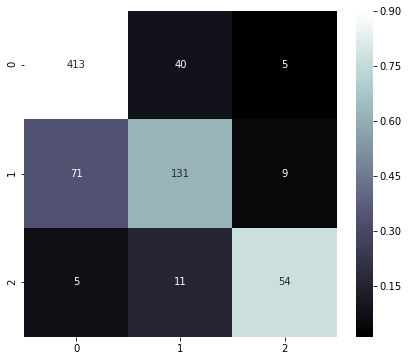

In [109]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
            'max_depth' : [2,4,6,8,10]
           
        }
FitModel(train[feature_names],train.fault_severity,'XGBoost',xgb.XGBClassifier(n_jobs=-1,objective='softprob'),param,cv=5)

# Balancing the dataset

In [112]:
train.fault_severity.value_counts()

0    4784
1    1871
2     726
Name: fault_severity, dtype: int64

In [102]:
from imblearn.over_sampling import SMOTE

In [104]:
SM = SMOTE(random_state=42)
x_resampled,y_resamples = SM.fit_resample(train[feature_names],train.fault_severity)

In [105]:
x_resampled.shape

(14352, 270)

In [106]:
y_resamples.shape

(14352,)

In [107]:
pd.Series(y_resamples).value_counts()

2    4784
1    4784
0    4784
dtype: int64

Training Dataset Shape : (12916, 270)
Test Dataset Shape : (1436, 270)
Training Label Shape:  (12916,)
Test Label Shape:  (1436,)

Training Started...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 80.8min finished



Predicting on Test Set...
[1 0 1 ... 0 0 2]

Best Params : {'max_depth': 8, 'n_estimators': 500}
Classification Report :               precision    recall  f1-score   support

           0       0.88      0.90      0.89       494
           1       0.89      0.85      0.87       463
           2       0.95      0.97      0.96       479

    accuracy                           0.91      1436
   macro avg       0.91      0.91      0.91      1436
weighted avg       0.91      0.91      0.91      1436

Accuracy Score : 0.9059888579387186
Confusion Matrix : 
 [[445  41   8]
 [ 53 393  17]
 [ 10   6 463]]



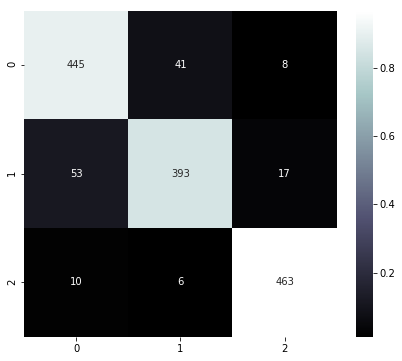

In [111]:
param ={
            'n_estimators': [100, 500, 1000, 2000],
            'max_depth' : [2,4,6,8,10]
           
        }
FitModel(x_resampled,y_resamples,'XGBoost',xgb.XGBClassifier(n_jobs=-1,objective='softprob'),param,cv=5)